In [1]:
import pandas as pd

# Load the data
temp_data = pd.read_csv('colombo_t_2012-2018.csv')
rh_data = pd.read_csv('colombo_rh_2012-2018.csv')


print(temp_data.head())
print(rh_data.head())

   station_id station_name element_name  year  month  day  obs_val
0       43466      COLOMBO       TMPMAX  2012      1    1     30.1
1       43466      COLOMBO       TMPMAX  2012      1    2     30.7
2       43466      COLOMBO       TMPMAX  2012      1    3     31.6
3       43466      COLOMBO       TMPMAX  2012      1    4     30.4
4       43466      COLOMBO       TMPMAX  2012      1    5     32.3
   station_id station_name element_name  year  month  day  obs_val
0       43466      COLOMBO        RHMAX  2012      1    1     91.0
1       43466      COLOMBO        RHMAX  2012      1    2     90.0
2       43466      COLOMBO        RHMAX  2012      1    3     89.0
3       43466      COLOMBO        RHMAX  2012      1    4     89.0
4       43466      COLOMBO        RHMAX  2012      1    5     95.0


In [2]:
# Convert the temperature from Celsius to Fahrenheit for the heat index calculation
temp_data['temp_F'] = temp_data['obs_val'] * 9/5 + 32

# Merge the temperature and humidity datasets on year, month, and day
combined_data = pd.merge(temp_data, rh_data, on=['year', 'month', 'day'], suffixes=('_temp', '_rh'))

In [3]:
combined_data

,station_id_temp,station_name_temp,element_name_temp,year,month,day,obs_val_temp,temp_F,station_id_rh,station_name_rh,element_name_rh,obs_val_rh
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1,86.18,43466,COLOMBO,RHMAX,91.0
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7,87.26,43466,COLOMBO,RHMAX,90.0
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6,88.88,43466,COLOMBO,RHMAX,89.0
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4,86.72,43466,COLOMBO,RHMAX,89.0
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3,90.14,43466,COLOMBO,RHMAX,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6590,43466,COLOMBO,TMPMAX,2018,12,30,32.8,91.04,43466,COLOMBO,RHMIN,55.0
6591,43466,COLOMBO,TMPMAX,2018,12,30,32.8,91.04,43466,COLOMBO,RHMAX,81.0
6592,43466,COLOMBO,TMPMAX,2018,12,31,31.4,88.52,43466,COLOMBO,RHMAX,82.0
6593,43466,COLOMBO,TMPMAX,2018,12,31,31.4,88.52,43466,COLOMBO,RHMIN,67.0


In [4]:
# Calculate the Heat Index using the provided formula
T = combined_data['temp_F']
RH = combined_data['obs_val_rh']
combined_data['HI'] = (-42.379 + 2.04901523 * T + 10.14333127 * RH 
                       - 0.22475541 * T * RH - 0.00683783 * T**2 - 0.05481717 * RH**2 
                       + 0.00122874 * T**2 * RH + 0.00085282 * T * RH**2 
                       - 0.00000199 * T**2 * RH**2)

# Create the 'date' column from 'year', 'month', 'day'
combined_data['date'] = pd.to_datetime(combined_data[['year', 'month', 'day']], errors='coerce')

# Drop any rows where the date could not be formed correctly
combined_data = combined_data.dropna(subset=['date'])

# Set the datetime index
combined_data.set_index('date', inplace=True)

# Drop original year, month, and day columns
combined_data.drop(columns=['year', 'month', 'day'], inplace=True)

# Drop duplicate rows
combined_data.drop_duplicates(inplace=True)


C:\Users\dulara\AppData\Local\Temp\ipykernel_17284\2319260197.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.drop(columns=['year', 'month', 'day'], inplace=True)
C:\Users\dulara\AppData\Local\Temp\ipykernel_17284\2319260197.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.drop_duplicates(inplace=True)


In [5]:
combined_data

,station_id_temp,station_name_temp,element_name_temp,obs_val_temp,temp_F,station_id_rh,station_name_rh,element_name_rh,obs_val_rh,HI
date,,,,,,,,,,
2012-01-01,43466,COLOMBO,TMPMAX,30.1,86.18,43466,COLOMBO,RHMAX,91.0,106.586916
2012-01-02,43466,COLOMBO,TMPMAX,30.7,87.26,43466,COLOMBO,RHMAX,90.0,110.222986
2012-01-03,43466,COLOMBO,TMPMAX,31.6,88.88,43466,COLOMBO,RHMAX,89.0,116.153191
2012-01-04,43466,COLOMBO,TMPMAX,30.4,86.72,43466,COLOMBO,RHMAX,89.0,107.436420
2012-01-05,43466,COLOMBO,TMPMAX,32.3,90.14,43466,COLOMBO,RHMAX,95.0,127.316863
...,...,...,...,...,...,...,...,...,...,...
2018-12-22,43466,COLOMBO,TMPMAX,28.9,84.02,43466,COLOMBO,RHMIN,78.0,93.287651
2018-12-28,43466,COLOMBO,TMPMAX,30.2,86.36,43466,COLOMBO,RHMIN,73.0,97.358730
2018-12-29,43466,COLOMBO,TMPMAX,31.4,88.52,43466,COLOMBO,RHMIN,68.0,100.492589


In [6]:
combined_data.drop(columns=['station_id_temp', 'station_name_temp','station_id_rh','station_name_rh'], inplace=True)
combined_data.shape

C:\Users\dulara\AppData\Local\Temp\ipykernel_17284\1052251057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.drop(columns=['station_id_temp', 'station_name_temp','station_id_rh','station_name_rh'], inplace=True)


(2946, 6)

In [7]:
combined_data

,element_name_temp,obs_val_temp,temp_F,element_name_rh,obs_val_rh,HI
date,,,,,,
2012-01-01,TMPMAX,30.1,86.18,RHMAX,91.0,106.586916
2012-01-02,TMPMAX,30.7,87.26,RHMAX,90.0,110.222986
2012-01-03,TMPMAX,31.6,88.88,RHMAX,89.0,116.153191
2012-01-04,TMPMAX,30.4,86.72,RHMAX,89.0,107.436420
2012-01-05,TMPMAX,32.3,90.14,RHMAX,95.0,127.316863
...,...,...,...,...,...,...
2018-12-22,TMPMAX,28.9,84.02,RHMIN,78.0,93.287651
2018-12-28,TMPMAX,30.2,86.36,RHMIN,73.0,97.358730
2018-12-29,TMPMAX,31.4,88.52,RHMIN,68.0,100.492589


In [8]:
combined_data.drop(columns=['element_name_temp', 'obs_val_temp','element_name_rh','obs_val_rh'], inplace=True)

C:\Users\dulara\AppData\Local\Temp\ipykernel_17284\1447131018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.drop(columns=['element_name_temp', 'obs_val_temp','element_name_rh','obs_val_rh'], inplace=True)


In [9]:
combined_data.drop(columns=['temp_F'], inplace=True)

C:\Users\dulara\AppData\Local\Temp\ipykernel_17284\1402821277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.drop(columns=['temp_F'], inplace=True)


In [10]:
combined_data

,HI
date,
2012-01-01,106.586916
2012-01-02,110.222986
2012-01-03,116.153191
2012-01-04,107.436420
2012-01-05,127.316863
...,...
2018-12-22,93.287651
2018-12-28,97.358730
2018-12-29,100.492589


In [11]:
# To save as a CSV file
combined_data.to_csv('combined_dataset.csv')

In [12]:
df = combined_data['HI'].resample('M').mean()

<AxesSubplot:xlabel='date'>

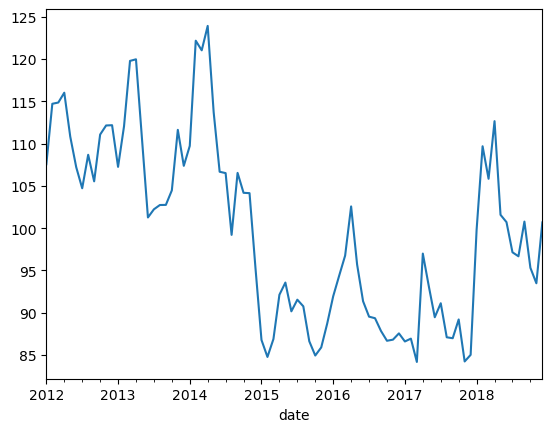

In [13]:
df.plot()

#### Split the dataset

In [14]:
len(df)

84

In [15]:
train = df[:64]
test = df[64:]

In [16]:
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error

####  Defining Parameter Ranges

In [17]:
p = range(0,8)
q = range(0,8)
d = range(0,2)


#     p: Order of the autoregressive part.
#     d: Degree of first differencing involved.
#     q: Order of the moving average part.

In [18]:
pdq_combination = list(itertools.product(p,d,q))

In [36]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [37]:
rmse = []
order1 = []

#### Grid Search for Best ARIMA Parameters

In [38]:
for pdq in pdq_combination:
    try:
        # Fit an ARIMA model with the current combination of p, d, q
        model = ARIMA(train, order=pdq).fit()

        # Make predictions for the test set
        pred = model.predict(start=len(train), end=(len(ts) - 1))

        # Calculate the RMSE
        error = np.sqrt(mean_squared_error(test, pred))

        # Append the RMSE and corresponding order (p, d, q) to lists
        order1.append(pdq)
        rmse.append(error)

    except:
        continue

In [39]:
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

In [40]:
results.to_csv('ARIMA_Model.csv')

#### Best Model Fitting

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
model = ARIMA(train, order=(7,1,7)).fit()

D:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Predicting the Past 12 Months

In [44]:
# # Predict the last 12 months from the training data for backtesting
# past_12_months_predictions = model.predict(start=len(train)-12, end=len(train)-1, typ='levels')

In [45]:
# past_12_months_predictions

In [46]:
past_12_months_predictions = model.predict(start=len(train)-12, end=len(train)-1, typ='levels')

# Create a DataFrame from the predictions

past_12_months_predictions_df = pd.DataFrame({
    'Date': past_12_months_predictions.index,       
    'Predicted_HI': past_12_months_predictions.values  
})

# Set the 'Date' column as the index if required (optional)
past_12_months_predictions_df.set_index('Date', inplace=True)

In [85]:
past_12_months_predictions_df

,Predicted_HI
Date,
2016-05-31,100.701168
2016-06-30,96.890362
2016-07-31,90.586060
2016-08-31,89.006070
2016-09-30,92.123086
2016-10-31,88.260597
2016-11-30,86.761626
2016-12-31,88.426773
2017-01-31,88.654870


In [86]:
past_12_months_predictions_df.to_csv('past_12_months_predictions_new.csv')

In [47]:
# Saving the DataFrame to a text file with tab delimiters
past_12_months_predictions_df.to_csv('past_12_months_predictions_new.txt', sep='\t', index=True)


In [87]:
# # Creating a date range for the last 12 months of the train dataset
# dates = pd.date_range(start=train.index[len(train)-12], periods=12, freq='M')

# # Creating a DataFrame with the desired column names
# past_12_months_df = pd.DataFrame({
#     'Date': dates,
#     'Predicted_HI': past_12_months_predictions.values
# })

# # Optionally, set 'Date' as the index if you prefer it as an index
# past_12_months_df.set_index('Date', inplace=True)

# # Display the DataFrame
# print(past_12_months_df)

In [88]:
# # To save as a CSV file
# past_12_months_predictions.to_csv('past_12_months_predictions.csv')

#### Forecasting 12 Months Ahead

In [73]:
forecast_predictions = model.predict(start=len(train), end=len(train)+11, typ='levels')

In [89]:
# Create a DataFrame from the predictions

forecast_predictions_df = pd.DataFrame({
    'Date': forecast_predictions.index,       
    'Predicted_HI': forecast_predictions.values  
})

# Set the 'Date' column as the index if required (optional)
forecast_predictions_df.set_index('Date', inplace=True)

In [90]:
forecast_predictions_df

,Predicted_HI
Date,
2017-05-31,97.117649
2017-06-30,99.409106
2017-07-31,99.805829
2017-08-31,98.602867
2017-09-30,99.337171
2017-10-31,97.201350
2017-11-30,98.257380
2017-12-31,100.207180
2018-01-31,100.325892


In [91]:
forecast_predictions_df.to_csv('forecast_predictions_new.csv')

In [74]:
# # Creating a date range starting the day after the last date in the train dataset, for the next 12 months
# future_dates = pd.date_range(start=train.index[-1] + pd.DateOffset(days=1), periods=12, freq='M')

# # Creating a DataFrame with the desired column names
# forecast_df = pd.DataFrame({
#     'Date': future_dates,
#     'Predicted_HI': forecast_predictions.values
# })

# # Optionally, set 'Date' as the index if you prefer it as an index
# forecast_df.set_index('Date', inplace=True)

# # Display the DataFrame
# print(forecast_df)

            Predicted_HI
Date                    
2017-05-31     97.117649
2017-06-30     99.409106
2017-07-31     99.805829
2017-08-31     98.602867
2017-09-30     99.337171
2017-10-31     97.201350
2017-11-30     98.257380
2017-12-31    100.207180
2018-01-31    100.325892
2018-02-28     99.507022
2018-03-31     98.445741
2018-04-30     99.052759


In [75]:
# To save as a CSV file
forecast_predictions.to_csv('forecast_predictions.csv')

### Visualizations

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

### Past 12 Months Predictions

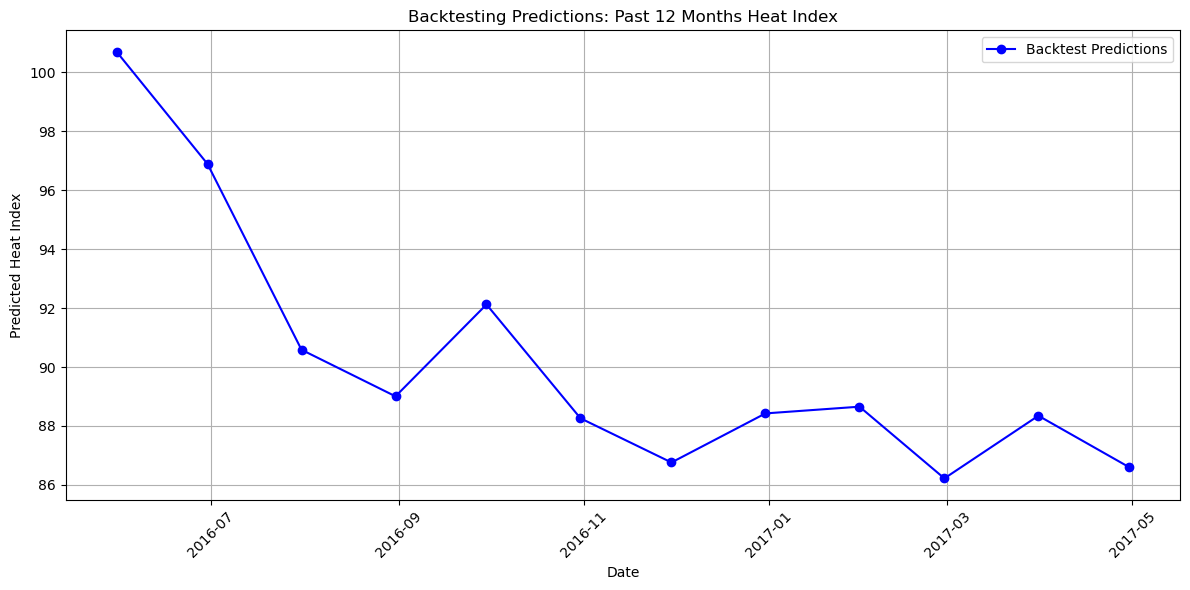

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(past_12_months_df.index, past_12_months_df['Predicted_HI'], marker='o', linestyle='-', color='blue', label='Backtest Predictions')
plt.title('Backtesting Predictions: Past 12 Months Heat Index')
plt.xlabel('Date')
plt.ylabel('Predicted Heat Index')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


### Next 12 Months Predictions

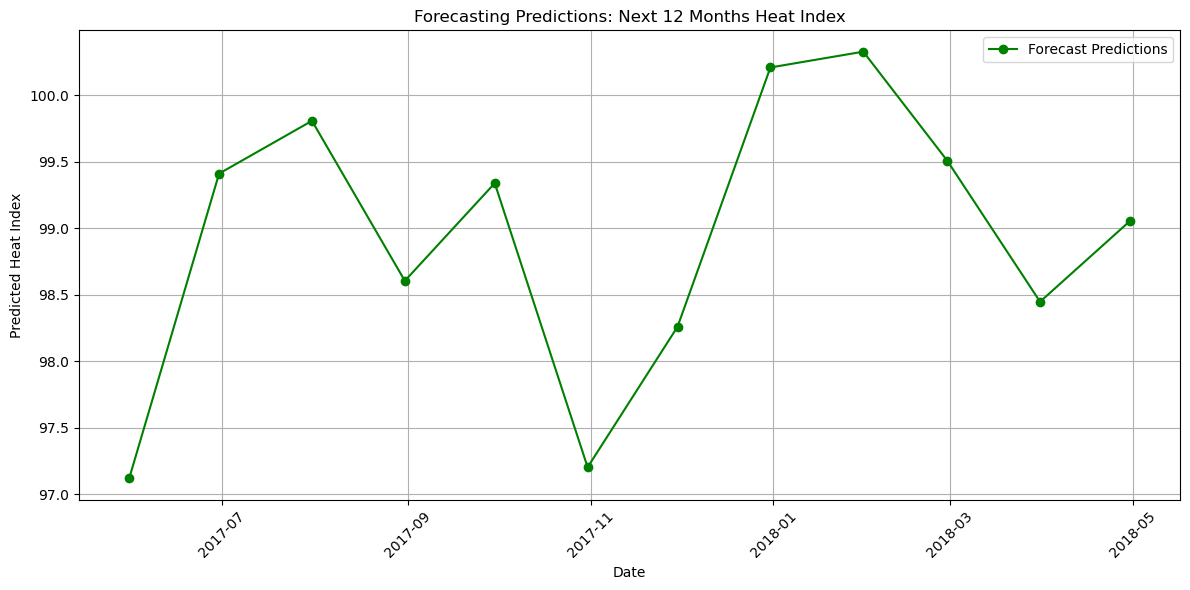

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Predicted_HI'], marker='o', linestyle='-', color='green', label='Forecast Predictions')
plt.title('Forecasting Predictions: Next 12 Months Heat Index')
plt.xlabel('Date')
plt.ylabel('Predicted Heat Index')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()